In [1]:
import numpy as np
import pandas as pd

In [2]:
# KODEX 코스닥150레버리지
# https://finance.naver.com/item/main.naver?code=233740#
STOCK_CODE = '233740' 

In [3]:
# DATA 결합하는 함수 - 같은 주식코드의 파일이 많을 경우 
def prepare_data_by_stock_code(code:str, directory:str='./data') -> pd.DataFrame:
    result = pd.DataFrame()
    
    # code로 디렉토리 내 파일 찾기 - ToDo
#     for XXXX:
#         new_df = pd.DataFrame()
#         result = pd.concat([result, new_df])
    
    # 날자 별 소팅 필요 - ToDo
    
    return result 

In [4]:
FILE_NAME = f'./data/{STOCK_CODE}_2022.09.05_2015.12.17.csv'
print(FILE_NAME)
df_kodaq = pd.read_csv(FILE_NAME, header=0, index_col=0,encoding='utf-8')

./data/233740_2022.09.05_2015.12.17.csv


In [5]:
df_kodaq.head()

,날짜,종가,전일비,시가,고가,저가,거래량
1,2022.09.05,8190.0,315.0,8495.0,8540.0,8135.0,14935814.0
2,2022.09.02,8505.0,5.0,8665.0,8705.0,8415.0,16814533.0
3,2022.09.01,8510.0,465.0,8760.0,8785.0,8455.0,11654272.0
4,2022.08.31,8975.0,200.0,8575.0,9085.0,8560.0,12716509.0
5,2022.08.30,8775.0,485.0,8395.0,8790.0,8390.0,13612929.0


In [6]:
# DataFrame 정보 확인
df_kodaq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1651 entries, 1 to 1
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1651 non-null   object 
 1   종가      1651 non-null   float64
 2   전일비     1651 non-null   float64
 3   시가      1651 non-null   float64
 4   고가      1651 non-null   float64
 5   저가      1651 non-null   float64
 6   거래량     1651 non-null   float64
dtypes: float64(6), object(1)
memory usage: 103.2+ KB


In [7]:
# 다시 한번 null 체크 
df_kodaq.isnull().sum()

날짜     0
종가     0
전일비    0
시가     0
고가     0
저가     0
거래량    0
dtype: int64

## Dataset 만들기 

In [20]:
df_dataset = pd.DataFrame()

df_dataset['date'] = df_kodaq.날짜
df_dataset['closed_v'] = df_kodaq.종가
df_dataset['closed_v'] = df_dataset['closed_v'].astype(int)

# 어제 종가 기준 %값
df_dataset['diff'] = 100 * (df_kodaq.종가 - df_kodaq.종가.shift(-1)) / df_kodaq.종가.shift(-1)
df_dataset['open'] = 100 * (df_kodaq.시가 - df_kodaq.종가.shift(-1)) / df_kodaq.종가.shift(-1)

# 오늘 시가 기준 %값
df_dataset['max'] = 100 * (df_kodaq.고가 - df_kodaq.시가) / df_kodaq.시가
df_dataset['min'] = 100 * (df_kodaq.저가 - df_kodaq.시가) / df_kodaq.시가
df_dataset['closed'] = 100 * (df_kodaq.종가 - df_kodaq.시가) / df_kodaq.시가

VOLUME_DIV = 10e5 # 1000000 # 기준 값을 백만
df_dataset['vol_index'] = df_kodaq.거래량 / VOLUME_DIV

# 마지막 값은 Null값이라 제거 
df_dataset = df_dataset[:-1] 

df_dataset['date'] = pd.to_datetime(df_dataset['date'])

# 일자(date)를 기준으로 오름차순 정렬
df_dataset = df_dataset.sort_values(by=['date'], ascending=True)

# index reset하기 - 기존 index 제거 O, inplace 넣기 
df_dataset.reset_index(drop=True, inplace=True)
        
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1650 non-null   datetime64[ns]
 1   closed_v   1650 non-null   int64         
 2   diff       1650 non-null   float64       
 3   open       1650 non-null   float64       
 4   max        1650 non-null   float64       
 5   min        1650 non-null   float64       
 6   closed     1650 non-null   float64       
 7   vol_index  1650 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 103.2 KB


In [21]:
df_dataset.head()

,date,closed_v,diff,open,max,min,closed,vol_index
0,2015-12-18,10710,3.678606,-0.968054,4.692082,-0.635386,4.692082,1.841150
1,2015-12-21,10720,0.093371,-0.140056,1.215521,-0.233754,0.233754,1.274858
2,2015-12-22,10495,-2.098881,0.186567,0.093110,-2.700186,-2.281192,1.374974
3,2015-12-23,10425,-0.666984,0.381134,0.949217,-1.139060,-1.044139,2.532341
4,2015-12-24,10295,-1.247002,0.527578,0.429389,-1.812977,-1.765267,1.536790


## Visualization / Data Analysis

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# # unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
# plt.rcParams['axes.unicode_minus'] = False

# # plt.rcParams['font.family'] = 'Malgun Gothic' # For windoews 
# plt.rcParams['font.family'] = 'AppleGothic'

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

<AxesSubplot:xlabel='diff', ylabel='Count'>

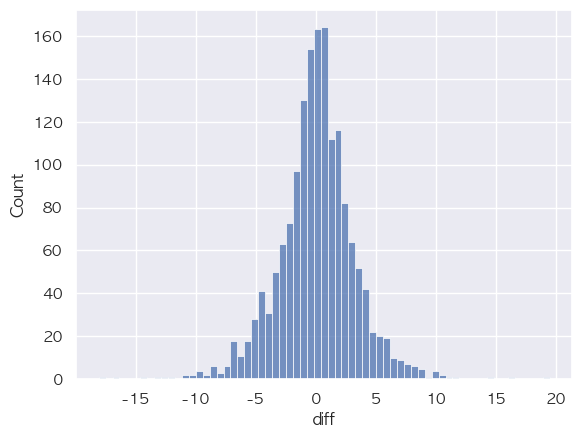

In [11]:
# 전일 대비 등락 
sns.histplot(data=df_dataset, x='diff') # 마지막 껀 빼야함 

<AxesSubplot:xlabel='vol_index', ylabel='Count'>

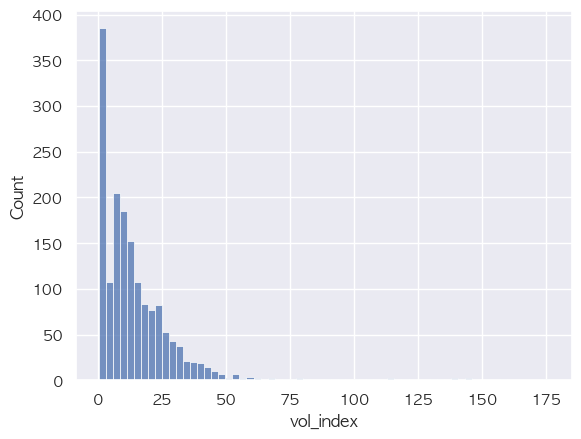

In [12]:
# 거래량 --> 백만 기준
sns.histplot(data=df_dataset, x='vol_index') 

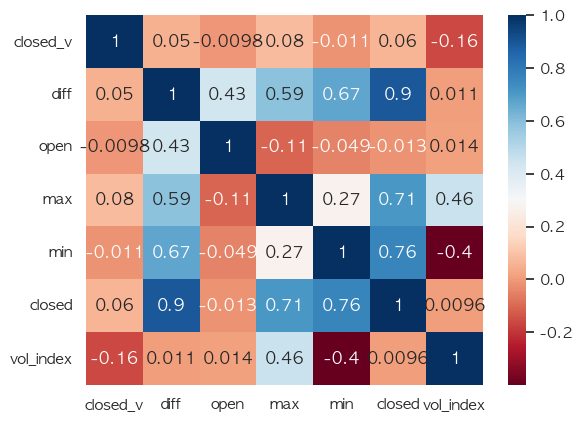

In [13]:
# 상관관계 분석
sns.heatmap(df_dataset.corr(), annot=True, cmap="RdBu")
plt.show()

## Dataset 저장

In [22]:
# csv 파일 저장 (이름 규칙: code.dataset.csv)
def save_dataset_csv(code_s:str, df_s: pd.DataFrame, data_dir:str = './data') -> None:
    filename = f'{code_s}.dataset.csv'
    print(filename)

    df_s.to_csv(data_dir+'/'+filename)

In [23]:
save_dataset_csv(STOCK_CODE, df_dataset)

233740.dataset.csv
